![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Albane Colmenares
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

***business problem***

The project's goal is to provide Microsoft's head of new movie studio with 3 recommendations for the new movie studio they are creating. The actionable insights are based on data on existing movies' performances by understanding which movies are doing best at the box office. 

From this data, this project will analyze potential causes for these movies to perform so well and how Microsoft can use this information to build their own successful movies.


***data***


***methods*** 

correlation 

***results***


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding


<ins>* Where did the data come from, how do they relate to the data analysis questions***</ins>

The data comes from... 
Main movies' data collection websites: Box Office Mojo, IMDb, Rotten Tomatoes, The Movie Database, and The Numbers


<ins>* What do the data represent? Who is in the sample and what variables are included?</ins>

The data represents all movies' key metrics of performance and descriptions: 

Basic movie's descriptions
- their title 
- the studio that created the movie
- in what year the movie first went out in theaters
- how long the movie runs for 
- what genre it belongs to
- in which language it is 
- if the movie and the movie's title was translated 


The persons involved in the movie's creation:
- actors
- directors 
- producers ????????
- writers


How movies were received
- ratings
- by the general public
- by journalists 


Movies' key performance metrics

- revenue generated at box office domestically
- revenue generated at box office in foreign countries 
- budget invested to make the movie




<ins>* What is the target variable?</ins>

The target variable is profit which is calculated by the sum of domestic and foreign box office revenue divided by the budget invested in the movie created. 


<ins>* What are the properties of the variables you intend to use? </ins>



## Data Preparation


***Indicate here what is being done to prepare the data***

5 sources provided 6 sources of data: 
1. Box Office Mojo: bom.movie_gross.csv.gz

2. IMDb: im.db.zip 

3. Rotten Tomatoes: 
* rt.movie_info.tsv.gz 
* & rt.reviews.tsv.gz

4. The Movie Database: tmdb.movies.csv.gz

5. The Numbers: tn.movie_budgets.csv.gz



The next lines of codes will open all data sources to understand what information is accessible, what needs to be cleaned or transformed to use the data for the analysis.


#### Importing standard packages

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

%matplotlib inline


#### 1. bom.movie_gross.csv.gz

In [2]:

# Loading bom.movie_gross and storing data into df_movie_gross
df_movie_gross = pd.read_csv('data/bom.movie_gross.csv.gz', compression='gzip')

df_movie_gross.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Inspect overall shape and info of the dataframe
df_movie_gross.shape
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# Inspect the studios in general
studios = df_movie_gross.drop_duplicates(subset=['studio'])
print(studios['studio'].tolist())
print(len(studios['studio'].tolist()))
# There are 258 production studios, which is large enough to remove 5 
# rows that don't have any studios. 

['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony', 'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS', 'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV', 'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.', 'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW', 'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE', 'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.', 'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.', 'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.', 'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM', 'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket', 'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4', 'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer', 'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP', 'RF', 'ArcEnt', 'PalUni', 'EpicPics', 'EOne', 'LD', 'AF', 'TFA', 'Myr.', 'BM&DH', 'SEG', 'PalT

In [5]:
# Dropping rows
df_movie_gross = df_movie_gross[df_movie_gross['studio'].notna()]
# Verifying that na rows were dropped 
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [6]:
# Inspecting movies that don't have domestic revenue: do they have a 
# foreign revenue? 
df_movie_gross[df_movie_gross['domestic_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
936,"Lula, Son of Brazil",NYer,NaN,3800000,2012


In [7]:
# All movies that don't have domestic revenue have foreign revenues so 
# they were distributed oversees 

In [8]:
# Now inspecting the same info for foreign revenue
df_movie_gross[df_movie_gross['foreign_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
# Convert foreign_gross column as float
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].str.replace(',','').astype(np.float64)

# Filling na values with 0 on both columns:
df_movie_gross.update(df_movie_gross[['domestic_gross', 'foreign_gross']].fillna(0))

df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


#### 2. im.db.zip

In [16]:
# Loading and inspecting available datasets
# Loading bom.movie_gross and storing data into df_movie_gross

import zipfile
with zipfile.ZipFile('data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


In [17]:
# Loading im.db and storing data into df_imdb

# Creating connection to database
conn = sqlite3.connect('data/im.db')

# Creating a cursor
cur = conn.cursor()


In [18]:
# Opening imdb database
imdb = pd.read_sql("""
                SELECT * 
                FROM sqlite_master
                ;
""", con=conn)
imdb

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [19]:
# Now  each table that are contained in imdb into a dataframe


In [20]:
# Opening and storing movie_basics table

movie_basics = pd.read_sql(
"""
SELECT * 
FROM movie_basics
;
"""
, con=conn)

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [21]:
movie_basics.info()

# start_year will be used to merge the dataframes and is an integer type: 
# will convert the string to integrer type in df_movie_budgets



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
# Opening and storing directors table

directors_df = pd.read_sql(
"""
SELECT * 
FROM directors
;
"""
, con=conn)

directors_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [23]:
# Opening and storing known_for table

known_for_df = pd.read_sql(
"""
SELECT * 
FROM known_for
;
"""
, con=conn)

known_for_df

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [24]:
# Opening and storing movie_akas table

movie_akas_df = pd.read_sql(
"""
SELECT * 
FROM movie_akas
;
"""
, con=conn)

movie_akas_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [25]:
# movie_id for Marvel's The Avengers where original_title = 1 
movie_akas_df[(movie_akas_df["title"].str.contains("Avengers")) & (movie_akas_df["is_original_title"] == 1)]

,movie_id,ordering,title,region,language,types,attributes,is_original_title
69881,tt2395427,24,Avengers: Age of Ultron,None,None,original,None,1.0
81106,tt0848228,19,The Avengers,None,None,original,None,1.0
190575,tt4154796,15,Avengers: Endgame,None,None,original,None,1.0
311338,tt4154756,30,Avengers: Infinity War,None,None,original,None,1.0


In [26]:
# what are region and attributes

# region
movie_akas_df[movie_akas_df["region"].notnull()]


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331695,tt9755806,2,Большая Акула,RU,None,None,None,0.0
331697,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [27]:
# attributes

movie_akas_df[movie_akas_df["attributes"].notnull()]

,movie_id,ordering,title,region,language,types,attributes,is_original_title
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
12,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
13,tt0369610,22,Jurassic World 3D,DE,None,None,3-D version,0.0
14,tt0369610,23,Jurassic World 3D,XWW,None,None,3-D version,0.0
21,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
...,...,...,...,...,...,...,...,...
331578,tt8899108,2,Volviendo a casa,UY,None,None,original subtitled version,0.0
331590,tt8997034,1,Little Germanics,XWW,en,None,informal literal English title,0.0
331633,tt9190740,1,Car Ribna Wali,IN,ur,None,alternative transliteration,0.0
331660,tt9447768,1,The Town School,LK,None,None,alternative transliteration,0.0


In [28]:
# Opening and storing movie_ratings table

movie_ratings_df = pd.read_sql(
"""
SELECT * 
FROM movie_ratings
;
"""
, con=conn)

movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [29]:
# Opening and storing persons table

persons_df = pd.read_sql(
"""
SELECT * 
FROM persons
;
"""
, con=conn)

persons_df


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [30]:
# Opening and storing principals table

principals_df = pd.read_sql(
"""
SELECT * 
FROM principals
;
"""
, con=conn)

principals_df

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [31]:
# Opening and storing writers table

writers_df = pd.read_sql(
"""
SELECT * 
FROM writers
;
"""
, con=conn)

writers_df

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


#### 3. rt.movie_info.tsv

In [32]:
# Inspecting rt.movie_info file
# Loading rt.movie_info and storing data into df_movie_info

df_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz', compression='gzip', sep='\t')

df_movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [33]:
# Inspect overall shape and info of the dataframe
df_movie_info.shape
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [34]:
# are there other currencies than box office? 

df_movie_info[df_movie_info["currency"].notnull()]["currency"].unique()

# no - only $

array(['$'], dtype=object)

In [35]:
# missing revenues in box office in df_movie_info but is it the same info in the first table

In [36]:
df_movie_info[df_movie_info["box_office"].notnull()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,"794,306",97 minutes,NaN


#### 4. rt.reviews.tsv

In [37]:
# Inspecting rt.reviews file
# Loading rt.reviews and storing data into df_reviews

df_reviews = pd.read_csv('data/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding = 'unicode_escape')
df_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [38]:
# Inspect overall shape and info of the dataframe
df_reviews.shape
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### 5. tmdb.movies.csv

In [39]:
# Inspecting tmdb.movies file
# Loading tmdb.movies and storing data into df_tmdb_movies
# Dropping the unnamed column as well 


df_tmdb_movies = pd.read_csv('data/tmdb.movies.csv.gz', compression='gzip', index_col=0)
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


If needed to change genre ids, use: explode. 


In [40]:
# Inspect overall shape and info of the dataframe
df_tmdb_movies.shape
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [41]:
# df_tmdb_movies.genre_ids[0]
df_tmdb_movies.genre_ids = df_tmdb_movies.genre_ids.apply(lambda x: x[1:-1].split(','))
df_tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [42]:
df_tmdb_movies[df_tmdb_movies["original_title"].str.contains("(?i)avatar")]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1831,[],278698,en,Avatar Spirits,0.600,2010-06-22,Avatar Spirits,9.5,2
3387,"[878, 27, 53]",79582,en,Aliens vs. Avatars,2.199,2011-09-20,Aliens vs. Avatars,2.4,12
23157,"[12, 10751]",460441,en,Avatar Flight of Passage,0.600,2017-05-01,Avatar Flight of Passage,10.0,1


In [43]:
type(df_tmdb_movies.genre_ids[0])

list

In [44]:
df_tmdb_movies.explode('genre_ids')


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,10751,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,14,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,12,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
...,...,...,...,...,...,...,...,...,...
26515,10751,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,12,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,28,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26516,53,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1


#### 6. tn.movie_budgets.csv

In [45]:
# Inspecting tn.movie_budgets file
# Loading tn.movie_budgets and storing data into df_movie_budgets

df_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz', compression='gzip')

df_movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [46]:
df_movie_budgets.shape
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [47]:
# Make all number columns as integers
columns_to_integers = ["production_budget" , "domestic_gross", "worldwide_gross"]

for column in columns_to_integers:
    df_movie_budgets[column] = df_movie_budgets[column].astype(str).str.replace(",", '').str.replace("$", "").astype(np.int)

df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [48]:
# Create year column

df_movie_budgets["year"] = df_movie_budgets["release_date"].str[-4:].astype(int)

df_movie_budgets["year"]

0       2009
1       2011
2       2019
3       2015
4       2017
        ... 
5777    2018
5778    1999
5779    2005
5780    2015
5781    2005
Name: year, Length: 5782, dtype: int64

In [49]:
# Probably not needed

In [50]:
df_movie_budgets[df_movie_budgets["movie"].str.contains("Avengers")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012
934,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,1998


In [51]:
# is id different from movie_id ? 

df_tmdb_movies[df_tmdb_movies["id"] == 27]

# id from df_movie_budgets and df_tmdb_movies don't match. Title is 9 songs when expected The Avengers

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
117,"[18, 10402, 10749]",27,en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170


In [52]:
# End of probably not needed

## Data Exploration


Start building the information that is needed to answer the question 

—> create the data frame to answer each question 

1. Creating the profit metric to determine which movies performed the highest
2. 1st correlation to test: genre and profit 
3. 2nd correlation to test: .... and profit
4. 3rd correlation to test: actors and profit 



Main metric determining the success of a movie = worldwide gross, as the focus is how a movie is performing at box office.  


Both Box Office Mojos and The Numbers' data sources display this information.

In [10]:
# Create a column total gross 
df_movie_gross["total_gross"] = df_movie_gross["domestic_gross"] + df_movie_gross["foreign_gross"]

In [11]:
# Sorting by highest total revenue generated by movies
df_movie_gross.sort_values(by=["total_gross"], ascending=False, inplace=True)
df_movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...,...
3078,2:22,Magn.,400.0,0.0,2017,4.000000e+02
2756,News From Planet Mars,KL,300.0,0.0,2016,3.000000e+02
2757,Satanic,Magn.,300.0,0.0,2016,3.000000e+02
2321,The Chambermaid,FM,300.0,0.0,2015,3.000000e+02


In [72]:
bmo_top_20 = df_movie_gross.head(20).reset_index(drop=True)
bmo_top_20

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
2,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
4,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
5,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
6,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
7,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
8,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
9,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [73]:
bmo_bottom_20 = df_movie_gross.tail(20).reset_index(drop=True)
bmo_bottom_20

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,An Invisible Sign,IFC,1300.0,0.0,2011,1300.0
1,Skin Trade,Magn.,1200.0,0.0,2015,1200.0
2,Caught in the Web,Vita.,1100.0,0.0,2013,1100.0
3,Thanks to My Friends,Distrib.,900.0,0.0,2015,900.0
4,I Spit on Your Grave 2,Anch.,800.0,0.0,2013,800.0
5,The Student and Mr. Henri,Distrib.,800.0,0.0,2016,800.0
6,Next Time I'll Aim for the Heart,Distrib.,800.0,0.0,2016,800.0
7,REC 4: Apocalypse,Magn.,800.0,0.0,2015,800.0
8,The Decoy Bride,IFC,800.0,0.0,2012,800.0
9,Into the White,Magn.,700.0,0.0,2013,700.0


But according to the Numbers, Avatar and Titanic are first 

In [53]:
# Sorting by highest total profit generated by movies
df_movie_budgets.sort_values(by=["worldwide_gross"], ascending=False, inplace=True)
df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015
...,...,...,...,...,...,...,...
5474,75,"Dec 31, 2005",Insomnia Manica,500000,0,0,2005
5473,74,"Jul 17, 2012",Girls Gone Dead,500000,0,0,2012
5472,73,"Apr 3, 2012",Enter Nowhere,500000,0,0,2012
5471,72,"Dec 31, 2010",Drones,500000,0,0,2010


In [75]:
tn_top_20 = df_movie_budgets.head(20)
tn_top_20

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,2015
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011


In [76]:
tn_bottom_20 = df_movie_budgets.tail(20)
tn_bottom_20

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
5489,90,"Dec 31, 2015",Rodeo Girl,500000,0,0,2015
5488,89,"Dec 31, 2014",The Sound and the Shadow,500000,0,0,2014
5487,88,"Dec 1, 2015",Brooklyn Bizarre,500000,0,0,2015
5486,87,"Aug 11, 2015",Alleluia! The Devil's Carnival,500000,0,0,2015
5485,86,"Jun 23, 2015",Crossroads,500000,0,0,2015
5484,85,"Dec 31, 1990",Going Under,500000,0,0,1990
5483,84,"Dec 31, 2013",Bucky and the Squirrels,500000,0,0,2013
5481,82,"Dec 31, 2012",El rey de Najayo,500000,0,0,2012
3743,44,"Feb 2, 2007",Partition,10000000,0,0,2007
5480,81,"Feb 10, 2015",Love in the Time of Monsters,500000,0,0,2015


In [ ]:
# Does BOM have any data on Avatar? 
# Avatar was released on 2009 while BOM data does not seem to capture this information 

In [96]:
# Verifying the years captured in BOM data to determine which data to base analysis on
df_movie_gross[df_movie_gross["title"].str.contains("Avatar")]

,title,studio,domestic_gross,foreign_gross,year,total_gross
128,Avatar: Special Edition,Fox,10700000.0,22500000.0,2010,33200000.0


In [95]:
years_bom = df_movie_gross["year"].unique().tolist()
sorted(years_bom)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [97]:
years_tn = df_movie_budgets["year"].unique().tolist()
sorted(years_tn)

[1915,
 1916,
 1920,
 1925,
 1927,
 1929,
 1930,
 1931,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [98]:
# Data from The Numbers will be used to base the analysis on. 
# It contains movies from 1915 to 2020, while BOM data only contains data from 2010 to 2018.

In [ ]:
# is the top 20 what should be used? 
# See distribution through histograms to determine

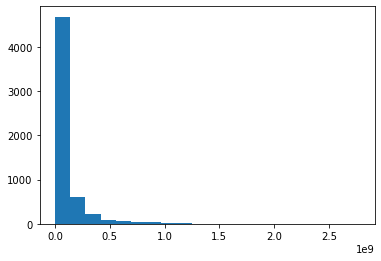

In [102]:
x = df_movie_budgets["worldwide_gross"]
# y = df_movie_budgets["id"]
num_bins = 20
plt.hist(x, num_bins)
plt.show()

In [ ]:
# The histogram is highly skewed to the left, indicating most movies 
# are far from making as much as the top performers 

In [ ]:
# Filter on movies that make at least 1B 

In [108]:
one_billion_plus_movies = df_movie_budgets[df_movie_budgets["worldwide_gross"] > 1000000000]
one_billion_plus_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,2015
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2018
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011


In [106]:
len(one_billion_plus_movies)

38

There are 38 movies that made box office revenues higher than $1 billion dollars. 

The analysis will be based on these.

### What was the genre of these movies? 

In [54]:
persons_df["primary_name"].unique()

array(['Mary Ellen Bauder', 'Joseph Bauer', 'Bruce Baum', ...,
       'Joo Yeon So', 'Michelle Modigliani', 'Pegasus Envoyé'],
      dtype=object)

In [55]:
# are there other currencies than box office? 

df_movie_info[df_movie_info["currency"].notnull()]["currency"].unique()

# no - only $

array(['$'], dtype=object)

In [56]:
# Inspect overall shape and info of the dataframe
df_movie_info.shape
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [57]:
# missing revenues in box office in df_movie_info but is it the same info in the first table

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

Using a Google sheet, I have listed all column names from all dataframes/tables to identify the ones I wanted to keep for the analysis.

The table df_movie_budgets seem to have all the necessary information to calculate performance: 

    1. domestic
    2. foreign 
    3. worldwide gross
    4. production budgets

It was verified before that how titles are named in df_movie_gross don't represent the majority of how they are named in other tables, whereas df_movie_budgets do.

Let's verify that worldwide gross indicated in df_movie_budgets correspond to the one indicated in df_movie_gross 

In [58]:
movie_non_null = movie_basics[movie_basics["original_title"].notnull()]

movie_non_null[movie_non_null["original_title"].str.contains("Avengers")]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
356,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
1030,tt10075836,The Avengers Assemble Premiere,The Avengers Assemble Premiere,2012,NaN,Action
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi"
105584,tt6172666,Avengers of Justice: Farce Wars,Avengers of Justice: Farce Wars,2018,87.0,"Action,Comedy,Family"
138087,tt8875872,Avengers: Reassembled,Avengers: Reassembled,2018,52.0,Sci-Fi
141910,tt9303032,Avengers: Legacy,Avengers: Legacy,2019,NaN,Sci-Fi


In [59]:
# Avengers in movie_akas

movie_akas_df[(movie_akas_df["title"].str.contains("Avengers")) & (movie_akas_df["is_original_title"] == 1)]



,movie_id,ordering,title,region,language,types,attributes,is_original_title
69881,tt2395427,24,Avengers: Age of Ultron,None,None,original,None,1.0
81106,tt0848228,19,The Avengers,None,None,original,None,1.0
190575,tt4154796,15,Avengers: Endgame,None,None,original,None,1.0
311338,tt4154756,30,Avengers: Infinity War,None,None,original,None,1.0


In [60]:
# movie title in movie_budgets

df_movie_budgets[df_movie_budgets["movie"].str.contains("Avengers")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
934,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,1998


In [61]:
df_movie_budgets[df_movie_budgets["movie"].str.contains("The Avengers")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012
934,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,1998


In [62]:
df_movie_gross[df_movie_gross["title"].str.contains("The Avengers")]

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09


In [63]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [64]:
# First, try to add movie_id to df_movie_gross
new_df = pd.merge(df_movie_budgets, movie_basics, how="left", left_on=["movie", "year"], right_on=["primary_title", "start_year"])
new_df

# using left join because can only measure the movies that have revenue associated to it



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,NaN,NaN,NaN,NaN,NaN,NaN
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,NaN,NaN,NaN,NaN,NaN,NaN
2,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,75,"Dec 31, 2005",Insomnia Manica,500000,0,0,2005,NaN,NaN,NaN,NaN,NaN,NaN
5841,74,"Jul 17, 2012",Girls Gone Dead,500000,0,0,2012,tt1884318,Girls Gone Dead,Girls Gone Dead,2012.0,104.0,"Comedy,Horror"
5842,73,"Apr 3, 2012",Enter Nowhere,500000,0,0,2012,NaN,NaN,NaN,NaN,NaN,NaN
5843,72,"Dec 31, 2010",Drones,500000,0,0,2010,tt1232775,Drones,Drones,2010.0,98.0,Comedy


In [65]:
# verify that avatar does not have a start date on movie_basics
movie_basics[movie_basics["primary_title"].notnull().astype(str).str.contains("(?i)avatar")]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres


In [66]:
df_movie_gross[df_movie_gross["title"].str.contains("(?i)avatar")]

,title,studio,domestic_gross,foreign_gross,year,total_gross
128,Avatar: Special Edition,Fox,10700000.0,22500000.0,2010,33200000.0


In [67]:
movie_akas_df[(movie_akas_df["title"].str.contains("(?i)avatar")) 
              & (movie_akas_df["is_original_title"] == 1)]


,movie_id,ordering,title,region,language,types,attributes,is_original_title
48402,tt2271191,1,Avatars as Prostitutes,None,None,original,None,1.0
60319,tt1757678,4,Avatar 3,None,None,original,None,1.0
62979,tt1630029,7,Avatar 2,None,None,original,None,1.0
109149,tt1854506,2,Aliens vs. Avatars,None,None,original,None,1.0
151589,tt0253093,1,Gangavataran,None,None,original,None,1.0
200643,tt3095356,3,Avatar 4,None,None,original,None,1.0


In [68]:
# Here you run your code to clean the data


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [69]:
# Drop the column Unnamed: 0 with axis=1
# Example heroes_df = heroes_df.drop(['Unnamed: 0'], axis=1)
# heroes_df.head()

# tn.movie_budgets: turn object columns as numbers and strip $ and , 

In [70]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [71]:
# Closing connection
# conn.close()